In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv(r"C:\Users\Croma Campus\Downloads\housing.csv")

In [14]:
df.shape

(545, 13)

In [15]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [16]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
le = LabelEncoder()

In [19]:
obj_col = []
for col in df.select_dtypes(include="object"):
    df[col] = le.fit_transform(df[col])
    print(col,'\tEncoding Done!')
    obj_col.append(col)

mainroad 	Encoding Done!
guestroom 	Encoding Done!
basement 	Encoding Done!
hotwaterheating 	Encoding Done!
airconditioning 	Encoding Done!
prefarea 	Encoding Done!
furnishingstatus 	Encoding Done!


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int64
 6   guestroom         545 non-null    int64
 7   basement          545 non-null    int64
 8   hotwaterheating   545 non-null    int64
 9   airconditioning   545 non-null    int64
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    int64
 12  furnishingstatus  545 non-null    int64
dtypes: int64(13)
memory usage: 55.5 KB


In [22]:
for col in obj_col:
    print(df[col].unique())

[1 0]
[0 1]
[0 1]
[0 1]
[1 0]
[1 0]
[0 1 2]


In [43]:
df.head(2)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0


In [44]:
from sklearn.model_selection import train_test_split

In [46]:
X = df.drop(columns=['price'])
y = df['price']

In [50]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2 , random_state=11)

In [51]:
X_train.shape , X_test.shape

((436, 12), (109, 12))

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
scale = StandardScaler()

In [54]:
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.fit_transform(X_test)

In [55]:
from sklearn.linear_model import LinearRegression

In [57]:
model = LinearRegression()

In [58]:
model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [59]:
model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [60]:
y_pred = model.predict(X_test)

In [63]:
y_pred[:3]

array([6215897.08748544, 5250000.54369694, 4431384.92305498])

In [64]:
from sklearn.metrics import r2_score , mean_squared_error , mean_absolute_error

In [65]:
r2_score(y_pred,y_test)

0.5452773516609757

In [66]:
mean_absolute_error(y_pred,y_test)

779912.7102763061

In [67]:
mean_squared_error(y_pred,y_test)

1141281514441.7197

In [75]:
print(y_pred[0])
print(y_test.head(1))

6215897.087485437
136    5740000
Name: price, dtype: int64


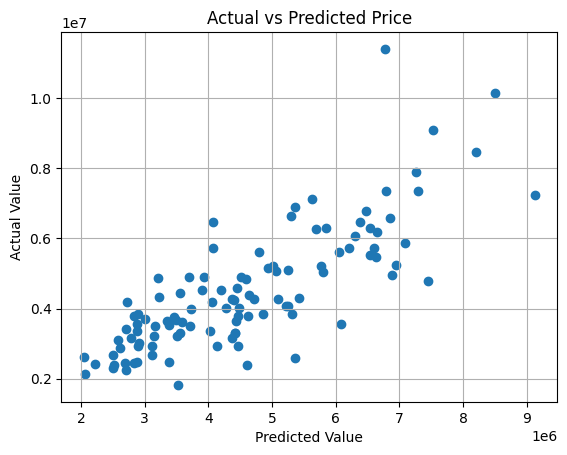

In [79]:
plt.scatter(y_pred,y_test)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.title("Actual vs Predicted Price")
plt.grid()
plt.show()